<a href="https://colab.research.google.com/github/Laurahg22/Trabajo-analitica-RH/blob/main/Limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Cargar paquetes siempre al inicio
import pandas as pd ### para manejo de datos
import sqlite3 as sql #### para bases de datos sql
import matplotlib as mpl ## gráficos
import matplotlib.pyplot as plt ### gráficos
import seaborn as sns
from pandas.plotting import scatter_matrix  ## para matriz de correlaciones
from sklearn import tree ###para ajustar arboles de decisión
from sklearn.tree import export_text ## para exportar reglas del árbol

In [ ]:
import os

# Nueva ruta que deseas establecer como directorio de trabajo
nueva_ruta = '/content/drive/MyDrive/Trabajo-analitica-RH'

# Cambiar al nuevo directorio
os.chdir(nueva_ruta)

# Verificar que el cambio se realizó correctamente imprimiendo el nuevo directorio de trabajo
print("Nuevo directorio de trabajo:", os.getcwd())

Nuevo directorio de trabajo: /content/drive/.shortcut-targets-by-id/1-Og2bPyGXzdyYHSkVZKLI_jqqPOlQKiC/Trabajo-analitica-RH


In [ ]:
import a_funciones as funciones ### archivo de funciones propias

In [ ]:
# Configurar la opción para mostrar todas las columnas completas
pd.set_option('display.max_columns', None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Trabajo-analitica-RH/data/data_final.csv')
df.head()

,index,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,InfoDate,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementDate,retirementType,resignationReason
0,0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,2015-12-31 00:00:00,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN
1,1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2015-12-31 00:00:00,3.0,2.0,4.0,2,4,Yes,2016-10-15 00:00:00,Resignation,Others
2,2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2015-12-31 00:00:00,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN
3,3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2015-12-31 00:00:00,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN
4,4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,2015-12-31 00:00:00,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    8820 non-null   int64  
 1   Age                      8820 non-null   int64  
 2   BusinessTravel           8820 non-null   object 
 3   Department               8820 non-null   object 
 4   DistanceFromHome         8820 non-null   int64  
 5   Education                8820 non-null   int64  
 6   EducationField           8820 non-null   object 
 7   EmployeeID               8820 non-null   int64  
 8   Gender                   8820 non-null   object 
 9   JobLevel                 8820 non-null   int64  
 10  JobRole                  8820 non-null   object 
 11  MaritalStatus            8820 non-null   object 
 12  MonthlyIncome            8820 non-null   int64  
 13  NumCompaniesWorked       8782 non-null   float64
 14  PercentSalaryHike       

In [ ]:
# eliminar variable index
df = df.drop(['index'], axis=1)

In [ ]:
# llenar nulos de la variable respuesta
condicion = (df['retirementType'] == 'fired') | (pd.isnull(df['retirementType']))
df.loc[condicion, 'Attrition'] = 'No'

In [ ]:
# pasar infoDate a formato fecha
df['InfoDate'] = pd.to_datetime(df['InfoDate'], format='%Y/%m/%d')
df['retirementDate'] = pd.to_datetime(df['retirementDate'], format='%Y/%m/%d')

In [ ]:
def imputar_con_moda(df, variables):
    for variable in variables:
        # Calcula la moda de la variable
        moda = df[variable].mode()[0]  # Selecciona el primer valor de la moda en caso de que haya múltiples modas
        # Imputa los valores nulos con la moda
        df[variable].fillna(moda, inplace=True)
        # Imprime información sobre los valores nulos imputados
        nulos_imputados = df[variable].isnull().sum()
    # Devuelve el DataFrame modificado
    return df

In [ ]:
# imputar datos nulos para NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
df = imputar_con_moda(df, ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [ ]:
df.isnull().sum()

Age                           0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeID                    0
Gender                        0
JobLevel                      0
JobRole                       0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
InfoDate                      0
EnvironmentSatisfaction       0
JobSatisfaction               0
WorkLifeBalance               0
JobInvolvement                0
PerformanceRating             0
Attrition                     0
retirementDate             8170
retirementType             8170
resignationReason          8235
dtype: int64

In [ ]:
for columna in df.columns:
    # Verifica si el dtype de la columna es 'object' (categórica)
    if df[columna].dtype == 'object':
        # Imprime el nombre de la columna
        print("Categorías de la columna '{}':".format(columna))
        # Imprime las categorías únicas de la columna
        print(df[columna].value_counts())

Categorías de la columna 'BusinessTravel':
Travel_Rarely        6258
Travel_Frequently    1662
Non-Travel            900
Name: BusinessTravel, dtype: int64
Categorías de la columna 'Department':
Research & Development    5766
Sales                     2676
Human Resources            378
Name: Department, dtype: int64
Categorías de la columna 'EducationField':
Life Sciences       3636
Medical             2784
Marketing            954
Technical Degree     792
Other                492
Human Resources      162
Name: EducationField, dtype: int64
Categorías de la columna 'Gender':
Male      5292
Female    3528
Name: Gender, dtype: int64
Categorías de la columna 'JobRole':
Sales Executive              1956
Research Scientist           1752
Laboratory Technician        1554
Manufacturing Director        870
Healthcare Representative     786
Manager                       612
Sales Representative          498
Research Director             480
Human Resources               312
Name: JobRole, dtyp

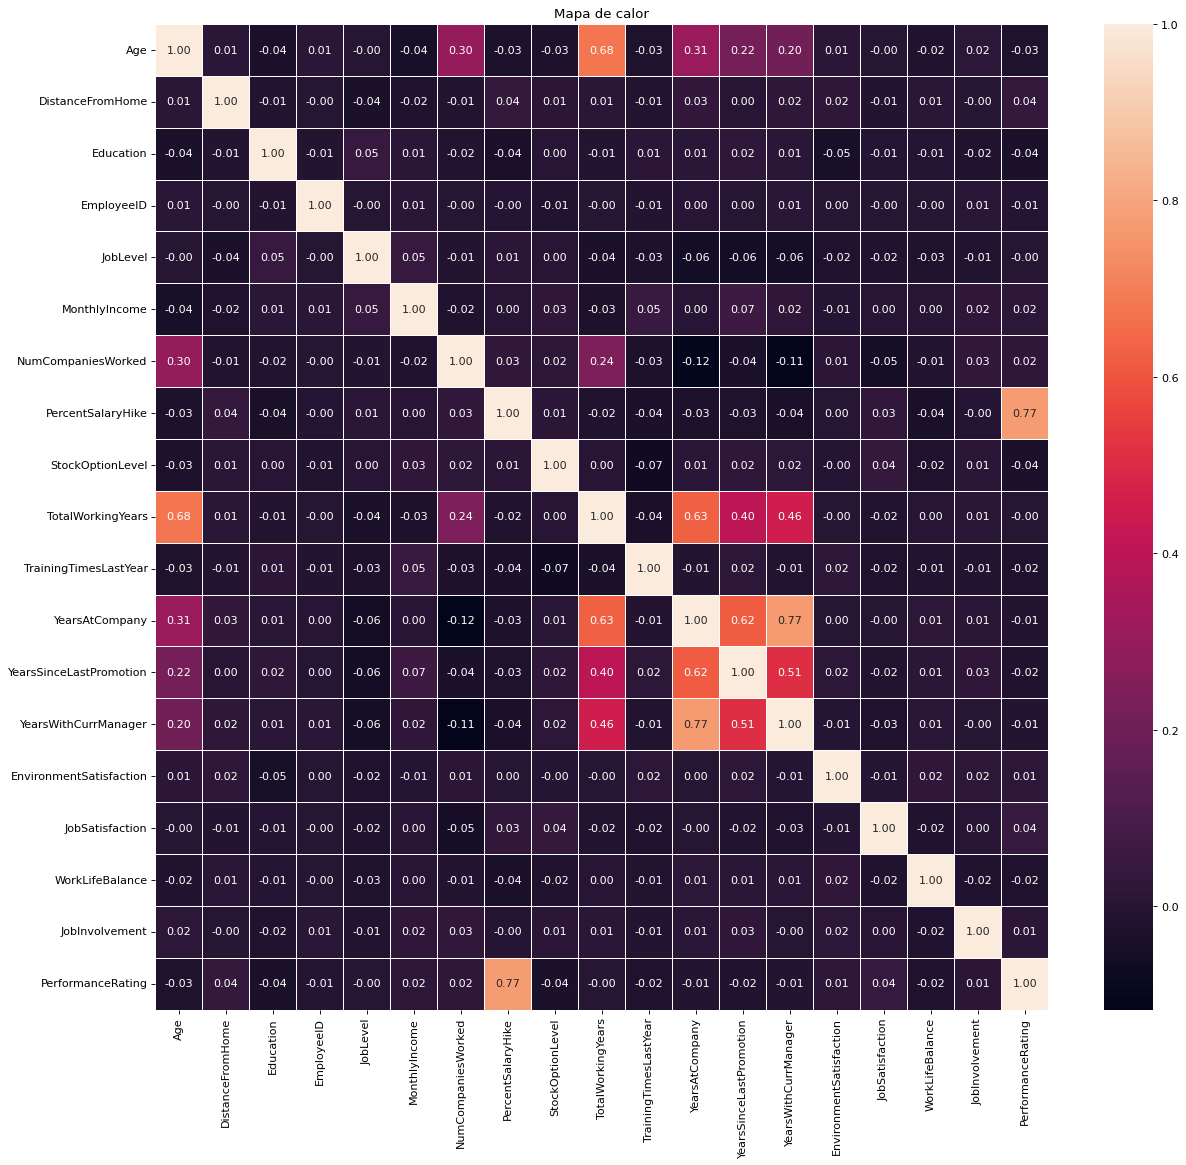

In [ ]:
#Se crea una variable solo con las variables numericas
variables_numericas = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación.
matriz_correlacion = variables_numericas.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(18, 16), dpi=80)
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", linewidths=0.5, linecolor='white')
plt.title("Mapa de calor")
plt.show()

Comentar el mapa de calor

In [ ]:
# falta borrar los Fired
#